<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/happy.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Happy 데이터를 대상으로 모델링을 진행합니다.
- LinearRegression 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


**데이터 설명**

- income: 수입 (단위: 10,000$)
- happiness: 행복 정도 (1~ 10)

In [4]:
# 하위 몇 개 행 확인
data.tail()

,income,happiness
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664
497,4.530545,3.710193


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
# 데이터 크기 확인
data.shape

(498, 2)

In [7]:
# 기술통계 확인
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [8]:
# 상관관계 확인
data.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


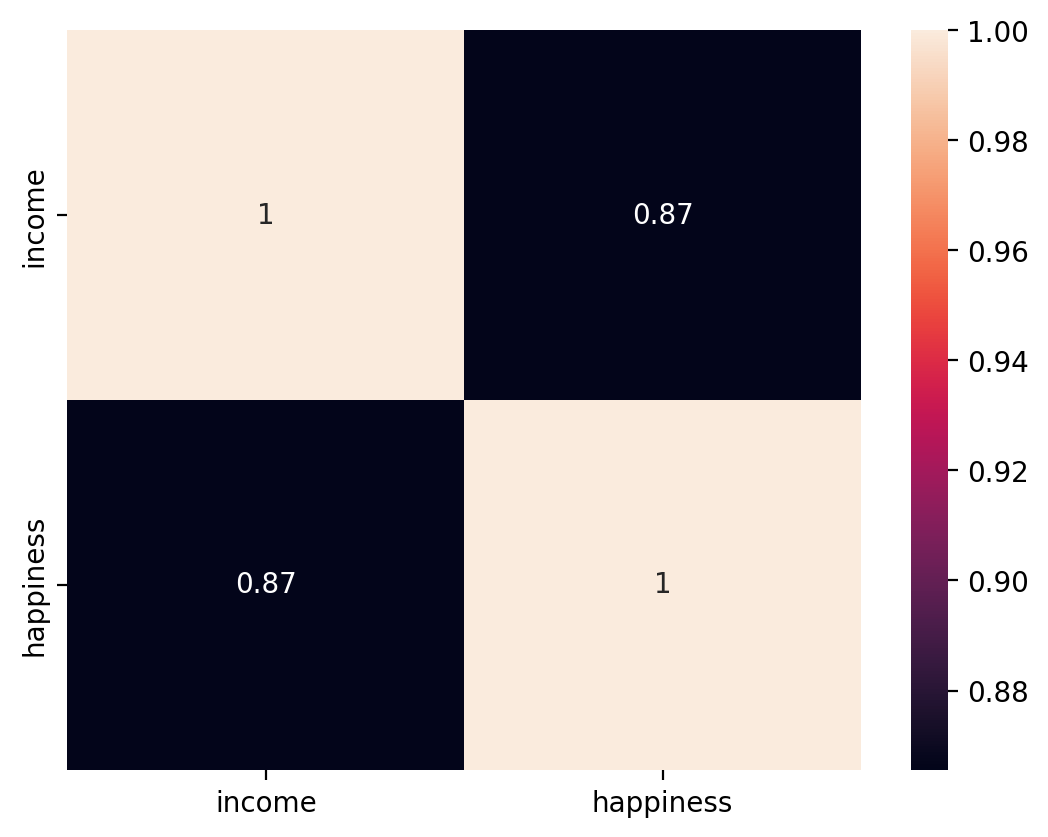

In [10]:
sns.heatmap(data.corr(), annot=True)
plt.show()

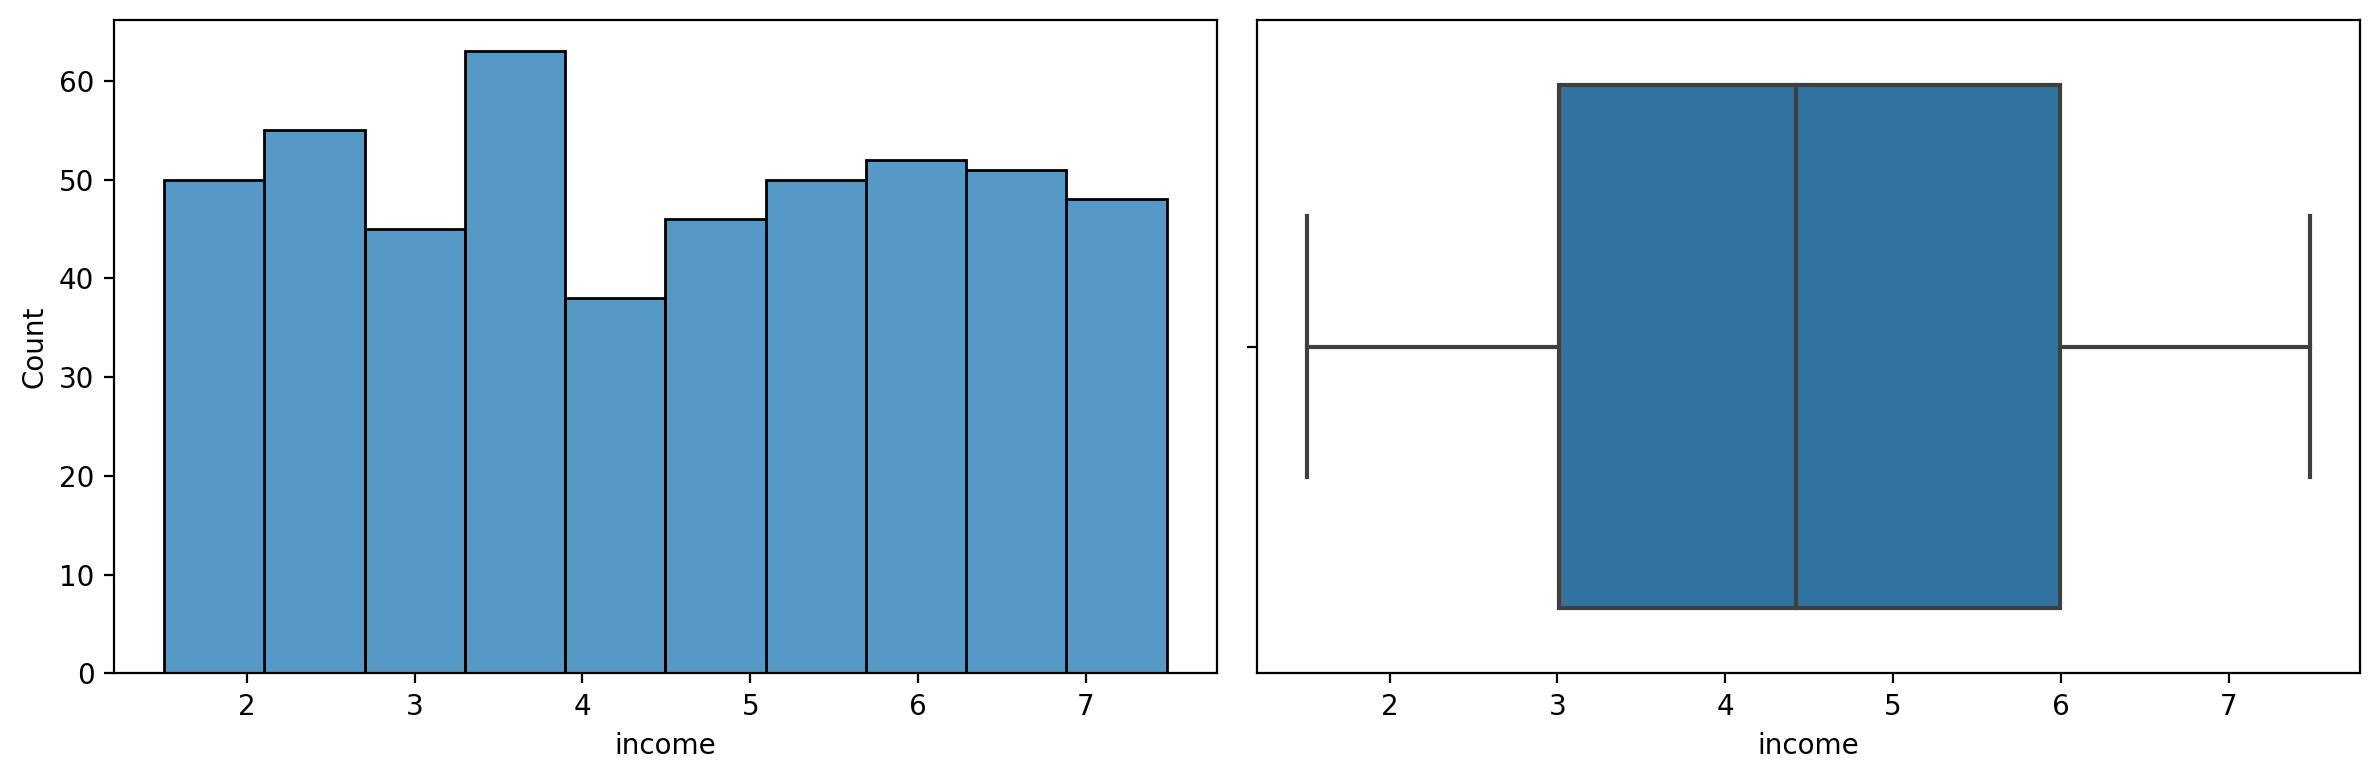

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(x='income', data=data)

plt.subplot(1,2,2)
sns.boxplot(x='income', data=data)

plt.tight_layout()
plt.show()

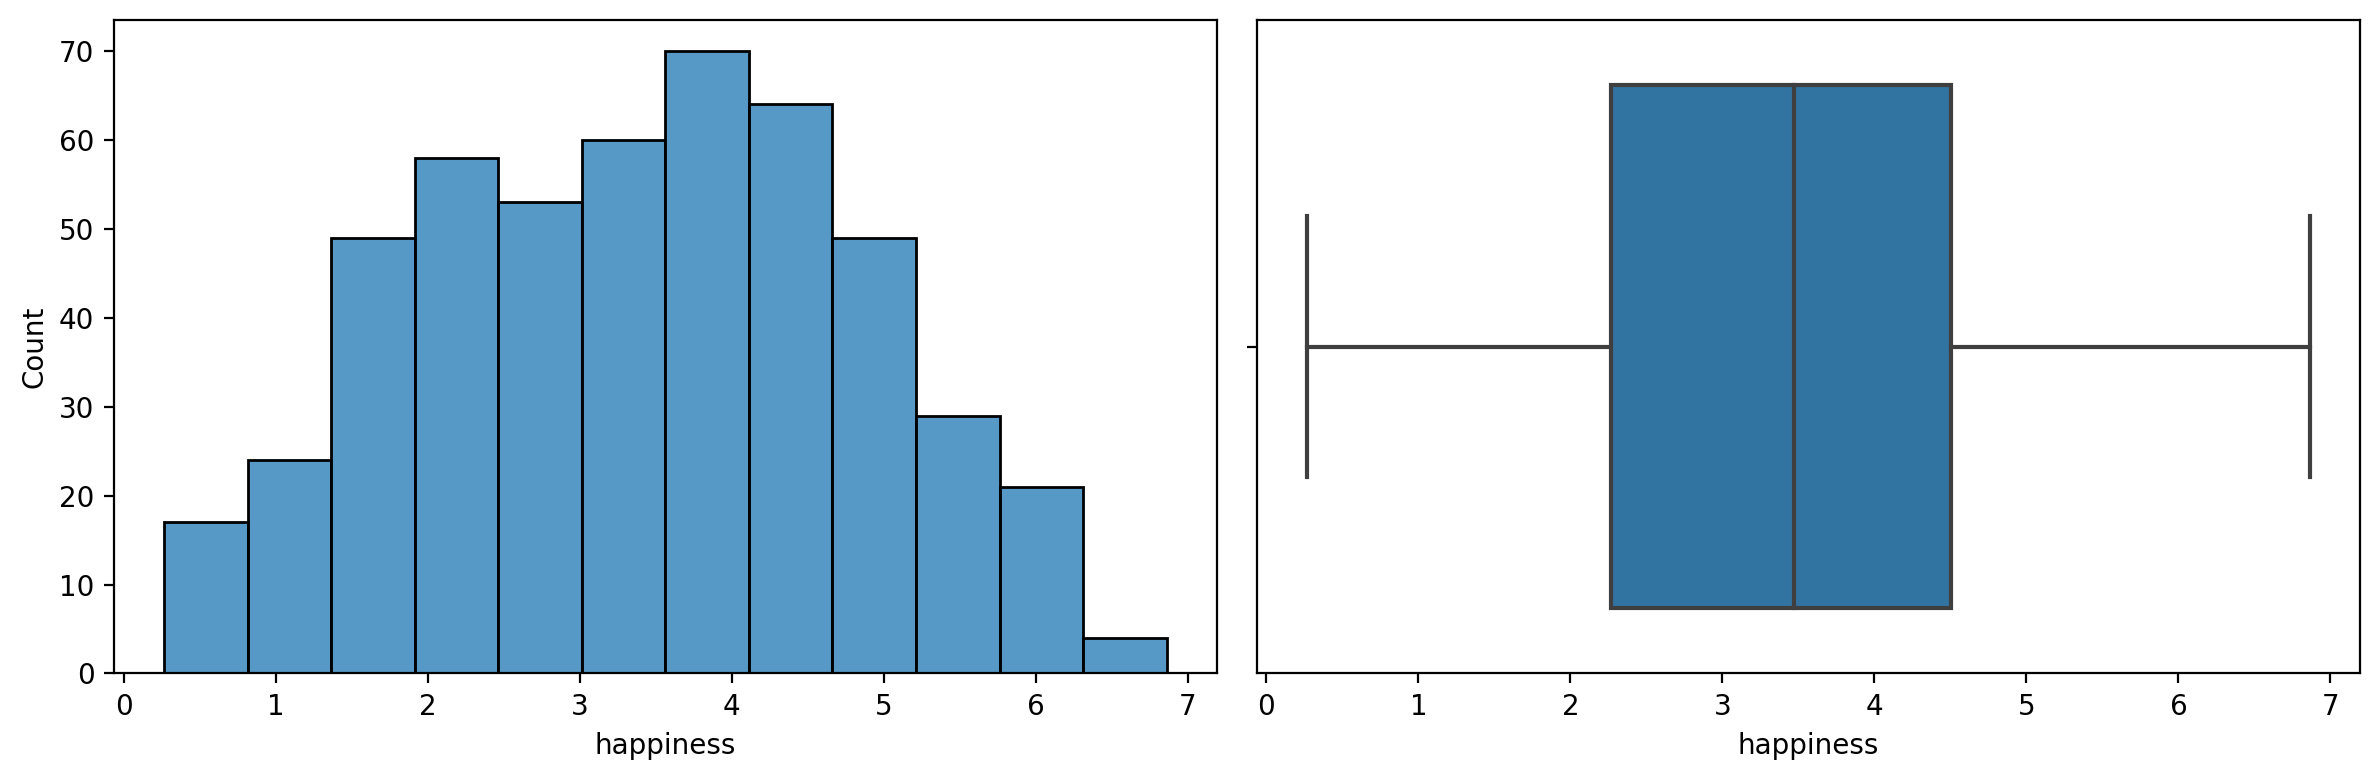

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(x='happiness', data=data)

plt.subplot(1,2,2)
sns.boxplot(x='happiness', data=data)

plt.tight_layout()
plt.show()

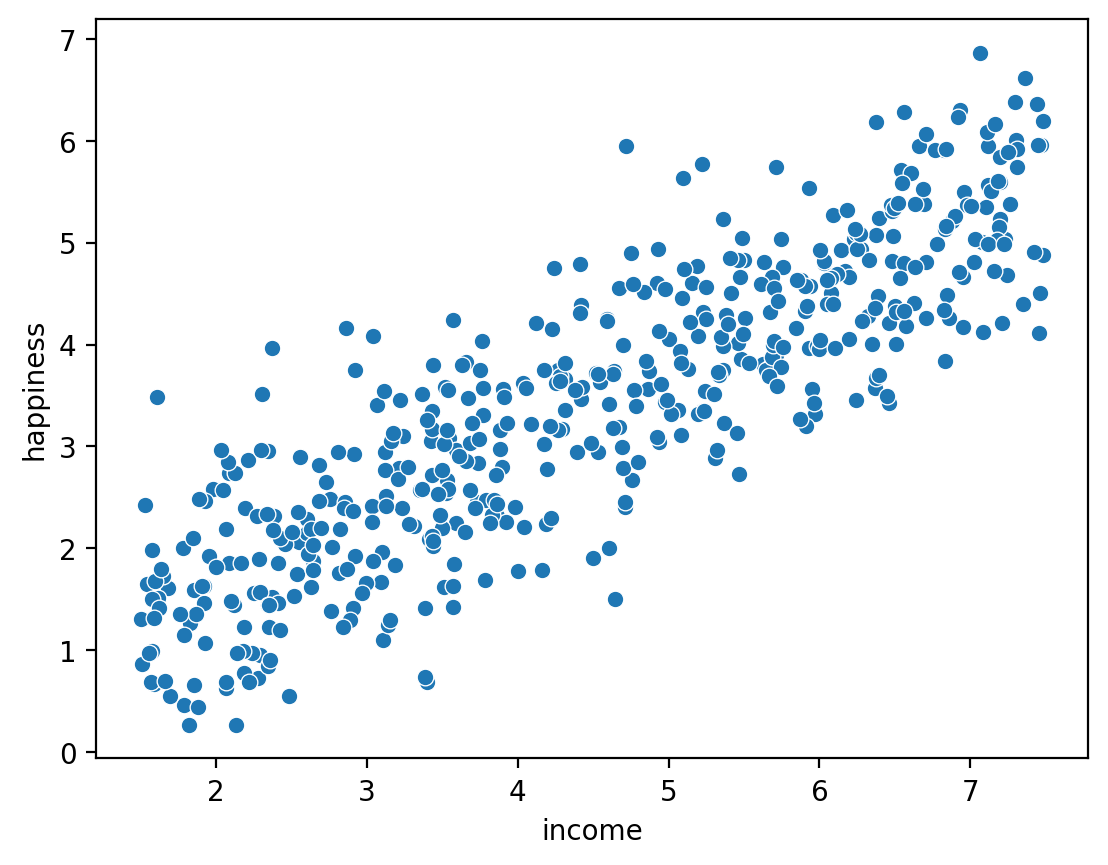

In [34]:
sns.scatterplot(x='income', y='happiness', data=data)
plt.show()

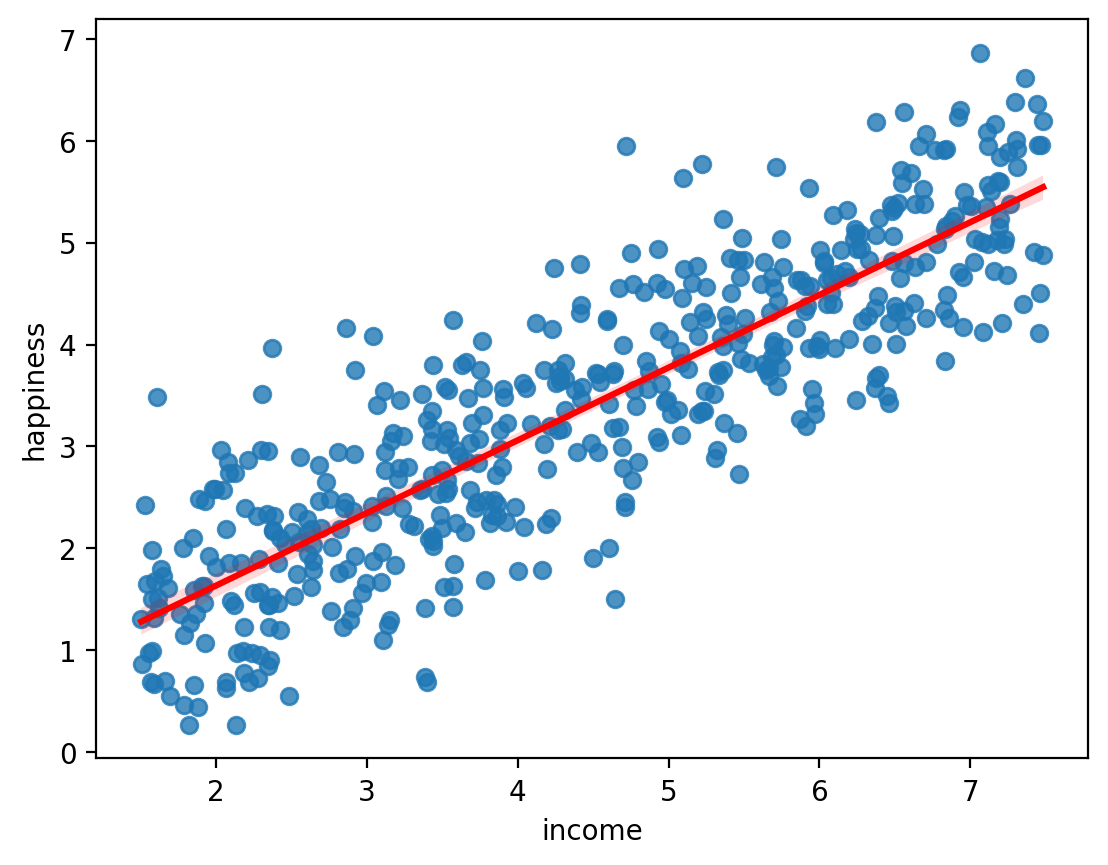

In [36]:
sns.regplot(x='income', y='happiness', data=data, line_kws={'color':'red'})
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [17]:
# target 확인
target = 'happiness'

# 데이터 분리
x=data.drop(target,axis=1)
y=data[target]


**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [18]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다|.
    - 알고리즘: LinearRegression

In [19]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

In [20]:
# 2단계: 선언하기
model = LinearRegression()

In [21]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5.회귀 성능 평가

- 다양한 성능 지표로 회귀 모델 성능을 평가합니다.

**1) MAE(Mean Absolute Error)**

In [23]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
print('MAE :', mean_absolute_error(y_test, y_pred))

MAE : 0.5588237111283767


**2) MSE(Mean Squared Error)**

In [28]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('MSE :',mean_squared_error(y_test, y_pred))

MSE : 0.49834125870443396


**3) RMSE(Root Mean Squared Error)**

In [26]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False))

RMSE : 0.705932899576464


**4) MAPE(Mean Absolute Percentage Error)**

In [29]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_percentage_error

# 성능 평가
print('MAPE :', mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.2534283507792003


**5) R2-Score**

In [30]:
# 모듈 불러오기
from sklearn.metrics import r2_score

# 성능 평가
print('R2 :', r2_score(y_test, y_pred))

R2 : 0.7545536758581621


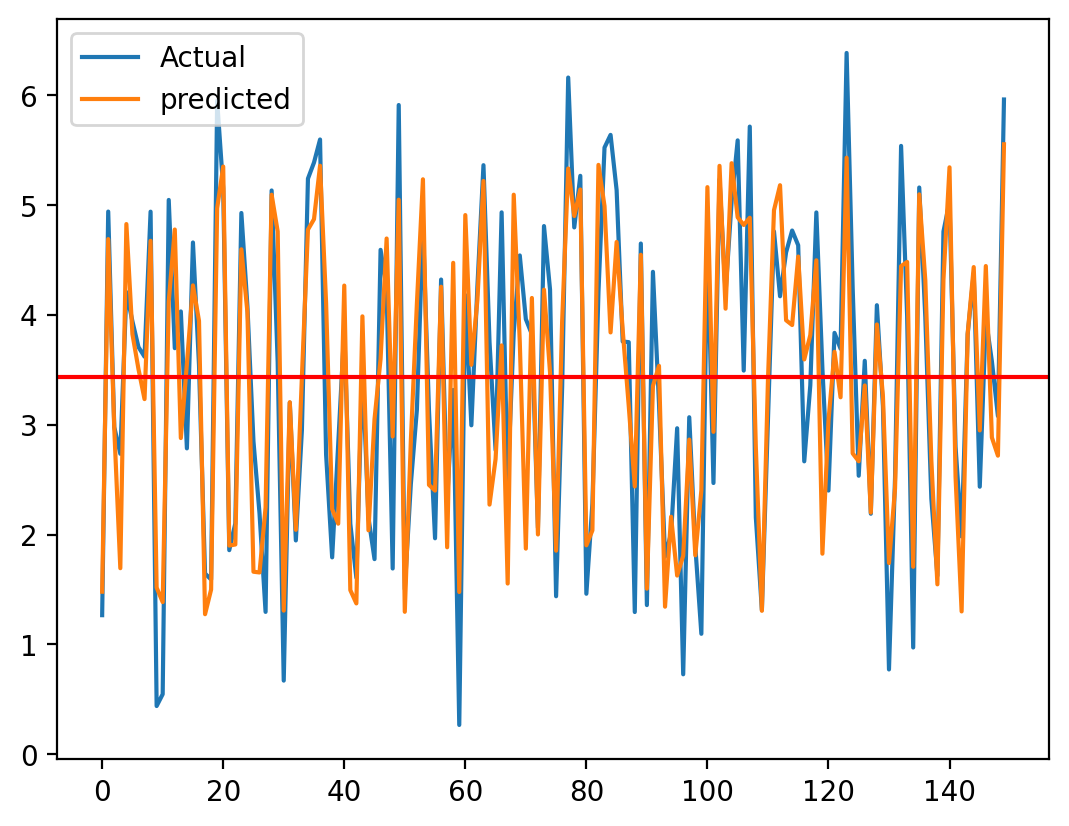

In [33]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label = 'predicted')
plt.axhline(y_test.mean(), c='r')

plt.legend()
plt.show()

In [37]:
# 평가 성능
model.score(x_test, y_test)

0.7545536758581621

In [38]:
# 학습 성능
model.score(x_train, y_train)

0.7467917792688501